TSA_Lab1

1.	Based on Moving Average Calculations:
•	Find the moving average for the list of integers [4, 8, 12, 16, 20, 24, 28, 32, 36, 40] with a window size of 3.

In [6]:
import numpy as np

# List of integers
data = np.array([4, 8, 12, 16, 20, 24, 28, 32, 36, 40])

# Window size
window_size = 3

# Calculate the moving average
moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

print("Moving Average", moving_avg)

Moving Average [ 8. 12. 16. 20. 24. 28. 32. 36.]


•	Calculate the moving average using a window size of 4 for the list [5, 10, 15, 20, 25, 30, 35, 40, 45, 50].

In [7]:
import numpy as np

# List of integers
data = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Window size
window_size = 4

# Calculate the moving average
moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

print("Moving Average", moving_avg)

Moving Average [12.5 17.5 22.5 27.5 32.5 37.5 42.5]


•	For the list [11, 22, 33, 44, 55, 66, 77, 88, 99, 110], find the moving average with a window size of 2.

In [8]:
import numpy as np

# List of integers
data = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99, 110])

# Window size
window_size = 2

# Calculate the moving average
moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

print("Moving Average", moving_avg)

Moving Average [ 16.5  27.5  38.5  49.5  60.5  71.5  82.5  93.5 104.5]


•	Determine the moving average with a window size of 3 for the list [9, 18, 27, 36, 45, 54, 63, 72, 81, 90].

In [9]:
import numpy as np

# List of integers
data = np.array([9, 18, 27, 36, 45, 54, 63, 72, 81, 90])

# Window size
window_size = 3

# Calculate the moving average
moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

print("Moving Average", moving_avg)

Moving Average [18. 27. 36. 45. 54. 63. 72. 81.]


2.	Perform an Augmented Dickey-Fuller (ADF) test on a dataset containing attrition data to determine whether the attrition rate is stationary: 

Year,Attrition Rate
2011,10
2012,11
2013,12
2014,13
2015,15
2016,17
2017,18
2018,20
2019,22
2020,23
2021,25
2022,27
2023,28

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('attrition_data.csv')

In [13]:
series=np.array(df['Attrition Rate'])

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.05269682131118837
p-value: 0.9539510010847496
Critial Values:
   1%, -4.6651863281249994
Critial Values:
   5%, -3.3671868750000002
Critial Values:
   10%, -2.802960625


We fail to reject the null hypothesis  as p value > 0.05 , the series is non-staionary

3.	To implement an Autoregressive (AR) model of order 1 (AR(1)) using Python and analyze its performance
•	Generate synthetic data for an AR(1) process with known parameters.
•	Plot the generated time series to visualize the data.
•	Implement an AR(1) model using either NumPy or statsmodels.
•	Fit the AR(1) model to the generated data.
•	Print the summary of the model results to analyze the estimated coefficients and model performance.
•	Check the best lag 


In [16]:
# Set known parameters
c = 2
phi1 = 0.5
num_steps = 100
 
# Step 1: Generate synthetic data for AR(1) process
np.random.seed(0)
epsilon = np.random.normal(0, 1, num_steps)
X = np.zeros(num_steps)
X[0] = c / (1 - phi1)  # Set initial value using steady state value
for t in range(1, num_steps):
 X[t] = c + phi1 * X[t-1] + epsilon[t]

In [17]:
print("Generated AR(1) series:")
for t, value in enumerate(X):
    print(f"X_{t}: {value}")

Generated AR(1) series:
X_0: 4.0
X_1: 4.400157208367223
X_2: 5.17881658828935
X_3: 6.830301493346133
X_4: 7.282708736823034
X_5: 4.664076488535106
X_6: 5.282126661793142
X_7: 4.489706122598873
X_8: 4.141634209505879
X_9: 4.481415606691312
X_10: 4.384751374506533
X_11: 5.646649194216241
X_12: 5.584362322255114
X_13: 4.913856177620385
X_14: 4.9007913215556185
X_15: 4.784069988152076
X_16: 5.8861140672336445
X_17: 4.7378987698510215
X_18: 4.682017086576412
X_19: 3.486912803986481
X_20: 1.190466586159162
X_21: 3.2488518885199413
X_22: 4.488862143119476
X_23: 3.5022660511532964
X_24: 6.020887649564256
X_25: 3.556078150183363
X_26: 3.8237975923931273
X_27: 3.72471494617073
X_28: 5.395136687443823
X_29: 6.166927113622197
X_30: 5.2384109825080145
X_31: 4.997368010856181
X_32: 3.6108982577979782
X_33: 1.8246526606750622
X_34: 2.564414181011378
X_35: 3.438556059609669
X_36: 4.949568710532555
X_37: 5.677164204050689
X_38: 4.4512552846173925
X_39: 3.9233248917333605
X_40: 2.913109480799587
X_41: 2

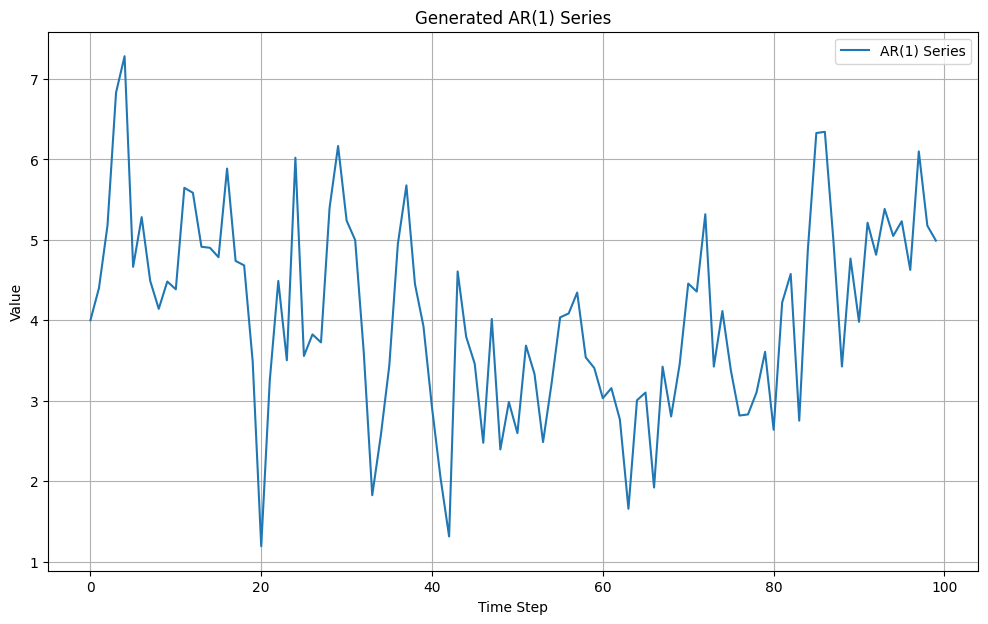

In [18]:
# Plot the generated series
plt.figure(figsize=(12, 7))
plt.plot(X, label='AR(1) Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Generated AR(1) Series')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
# Fit AR(1) model using statsmodels AutoReg
ar_model = AutoReg(X, lags=1)  # Fit AR(1) model
ar_results = ar_model.fit()

# Print model summary
print(ar_results.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -139.753
Method:               Conditional MLE   S.D. of innovations              0.993
Date:                Fri, 06 Sep 2024   AIC                            285.505
Time:                        15:08:49   BIC                            293.290
Sample:                             1   HQIC                           288.655
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6939      0.347      4.879      0.000       1.013       2.374
y.L1           0.5858      0.082      7.160      0.000       0.425       0.746
                                    Roots           

In [22]:
aic_values = []
bic_values = []
lag_range = range(1, 5)  # You can extend this range as needed

for lag in lag_range:
    model = AutoReg(X, lags=lag)
    model_fit = model.fit()
    aic_values.append(model_fit.aic)
    bic_values.append(model_fit.bic)

best_aic_lag = lag_range[np.argmin(aic_values)]
best_bic_lag = lag_range[np.argmin(bic_values)]

print(f"Best lag according to AIC: {best_aic_lag}")
print(f"Best lag according to BIC: {best_bic_lag}")

Best lag according to AIC: 4
Best lag according to BIC: 1
